In [67]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
%config InlineBackend.figure_format = "svg"

In [68]:
def createPreferenceGraph(n, maxPreferencesPerCategory) :
    strings = ["prefers to collaborate with", # question item = 0
               "prefers to socialize with", # question item = 1
               "perceives that the node ? prefers to collaborate with him", # question item = 2
               "perceives that the node ? prefers to socialize with him", # question item = 3
               "avoids to collaborate with", # question item = 4
               "avoids to socialize with", # question item = 5
               "perceives that the node ? avoids to collaborate with him", # question item = 6
               "perceives that the node ? avoids to socialize with him"] # question item = 7
    
    def editString(s, node1, node2) :
        if "?" in s :
            return f"node {node1} {str(node2).join(s.split('?'))}"
        else :
            return f"node {node1} {s} node {node2}"

    G = nx.MultiDiGraph()
    G.add_nodes_from(range(n))

    for node in G.nodes() :
        # neglect current node
        nodes = list(filter(lambda item : item != node, G.nodes()))

        # find number of answers for the 8 question items
        numberOfChoices = np.random.choice(range(1, maxPreferencesPerCategory + 1), size=8)
        
        # find answers (nodes-peers) for question items 0, 1, 2, 3
        peersA, peersB, peersC, peersD = np.random.choice(nodes, size=numberOfChoices[0], replace=False), \
            np.random.choice(nodes, size=numberOfChoices[1], replace=False), \
                np.random.choice(nodes, size=numberOfChoices[2], replace=False), \
                    np.random.choice(nodes, size=numberOfChoices[3], replace=False) 
         
        # find answers (nodes-peers) for question items 4, 5, 6, 7
        # !! neglect nodes already chosen in question items 0, 1, 2, 3 respectively (preference vs avoidance for item) !!
        peersE, peersF, peersG, peersH = np.random.choice(list(set(nodes)-set(peersA)), size=numberOfChoices[4], replace=False), \
            np.random.choice(list(set(nodes)-set(peersB)), size=numberOfChoices[5], replace=False), \
                np.random.choice(list(set(nodes)-set(peersC)), size=numberOfChoices[6], replace=False), \
                    np.random.choice(list(set(nodes)-set(peersD)), size=numberOfChoices[7], replace=False)

        # add edges in preferenceGraph with an opinion string and question item index
        weightIndex = 0
        for peers in [peersA, peersB, peersC, peersD, peersE, peersF, peersG, peersH] :
            for peer in peers :
                G.add_edge(int(node), int(peer), opinion=editString(strings[weightIndex], node, peer), questionItem=weightIndex)
            weightIndex += 1

    return G

In [69]:
options = {
    "n" : 100, # number of students
    "maxPreferencesPerCategory" : 20 # max number of student's preferences for a quiz question
}

G = createPreferenceGraph(**options)
print(f"number of nodes: {G.number_of_nodes()}")
print(f"number of edges: {G.number_of_edges()}")

plt.figure(figsize=(12,12))
plt.axis('equal')
options = {
            "node_color": "white",
            "edgecolors": "#b94042",
            "linewidths": 1,
            "node_size": 200,
            "edge_color": "#3a3b95",
            "font_size": 10,
            "font_color": "#b94042"
            }
nx.draw_circular(G, with_labels=True, **options)

number of nodes: 100
number of edges: 8416


In [70]:
for u, v, data in G.edges(data=True):
    print(f"{data['opinion']} => question item = {data['questionItem']}")

node 0 prefers to collaborate with node 50 => question item = 0
node 0 perceives that the node 50 prefers to collaborate with him => question item = 2
node 0 prefers to collaborate with node 97 => question item = 0
node 0 perceives that the node 97 prefers to collaborate with him => question item = 2
node 0 prefers to collaborate with node 71 => question item = 0
node 0 prefers to collaborate with node 16 => question item = 0
node 0 perceives that the node 16 prefers to collaborate with him => question item = 2
node 0 prefers to collaborate with node 32 => question item = 0
node 0 prefers to collaborate with node 33 => question item = 0
node 0 perceives that the node 33 avoids to socialize with him => question item = 7
node 0 prefers to collaborate with node 92 => question item = 0
node 0 prefers to collaborate with node 68 => question item = 0
node 0 prefers to socialize with node 68 => question item = 1
node 0 prefers to collaborate with node 20 => question item = 0
node 0 perceives 

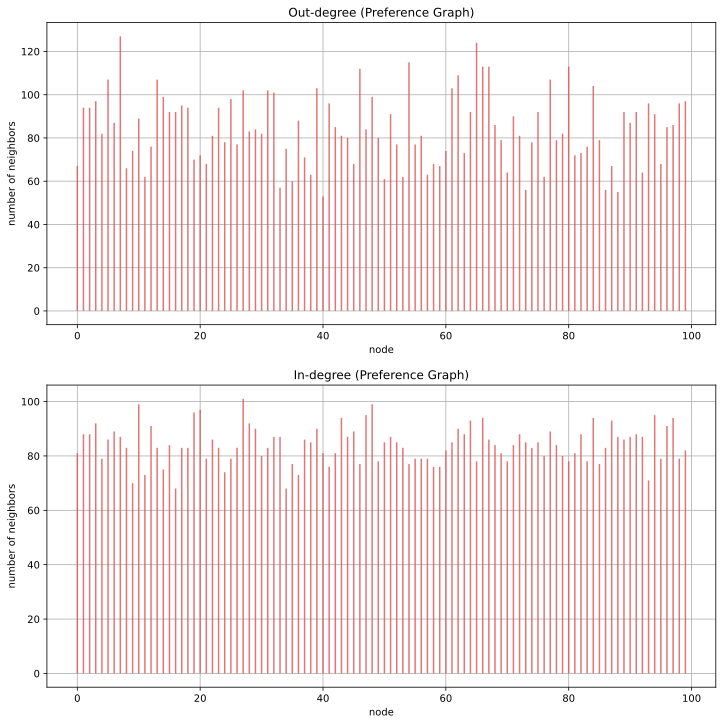

In [71]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))
degrees = [dict(G.out_degree()), dict(G.in_degree())]

for i in range(2) :
    ax[i].vlines(x=list(degrees[i].keys()), ymin=0, ymax=list(degrees[i].values()), color="#DB5454", alpha=0.8)
    ax[i].grid(True)
    ax[i].set_title(f"{['Out-degree', 'In-degree'][i]} (Preference Graph)")
    ax[i].set_xlabel("node")
    ax[i].set_ylabel("number of neighbors")

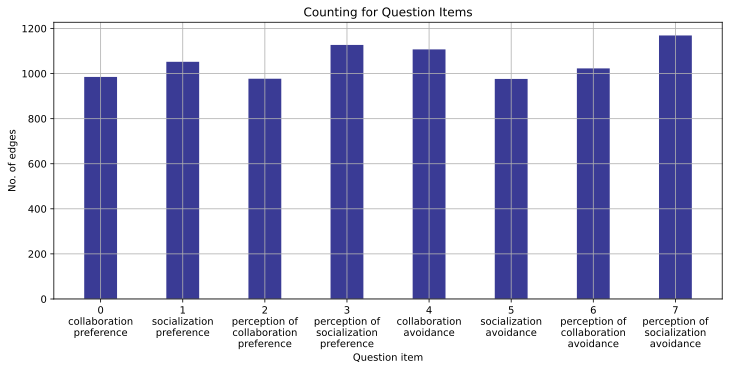

In [72]:
questionItemsCounting = [0]*8
for u, v, data in G.edges(data=True) :
    questionItemsCounting[data["questionItem"]] += 1

fig = plt.figure(figsize = (12, 5))
plt.bar(["0\ncollaboration\npreference",
        "1\nsocialization\npreference",
        "2\nperception of\ncollaboration\npreference",
        "3\nperception of\nsocialization\npreference",
        "4\ncollaboration\navoidance",
        "5\nsocialization\navoidance",
        "6\nperception of\ncollaboration\navoidance",
        "7\nperception of\nsocialization\navoidance"], questionItemsCounting, color ="#3a3b95", width = 0.4)
plt.grid(True)
plt.xlabel("Question item")
plt.ylabel("No. of edges")
plt.title("Counting for Question Items")
plt.show()

In [73]:
def saveGraphJson(G, path) :
    def convertToJSON(G) :
        nodes = [{"id": node} for node in G.nodes()]
        
        edges = [{
            "source": i,
            "target": j,
            "opinion": data["opinion"],
            "question item": data['questionItem']
        } for i, j, data in G.edges(data=True)]

        return {
            "nodes": nodes,
            "edges": edges
        }
    with open(path, "w") as write_file:
        json.dump(convertToJSON(G), write_file)


Counter({0.3: 491, 1.0: 483, 0.0: 468, 0.7: 456, 0.5: 371, 0.35: 260, 0.15: 255, 0.65: 231, 0.85: 224, 0.425: 77, 0.575: 69, 0.6: 49, 0.675: 49, 0.475: 49, 0.25: 41, 0.325: 41, 0.32499999999999996: 37, 0.5249999999999999: 36, 0.4: 36, 0.075: 35, 0.925: 33, 0.75: 33, 0.22499999999999998: 32, 0.825: 32, 0.175: 29, 0.7749999999999999: 23, 0.5666666666666667: 16, 0.7999999999999999: 15, 0.5333333333333333: 15, 0.09999999999999999: 14, 0.43333333333333335: 14, 0.6666666666666666: 12, 0.3333333333333333: 10, 0.5166666666666666: 10, 0.7666666666666666: 9, 0.4666666666666666: 8, 0.2333333333333333: 8, 0.31666666666666665: 7, 0.7166666666666667: 7, 0.19999999999999998: 7, 0.16666666666666666: 6, 0.4833333333333333: 6, 0.55: 5, 0.9: 4, 0.6833333333333333: 4, 0.7333333333333333: 4, 0.4916666666666667: 4, 0.26666666666666666: 4, 0.8833333333333333: 4, 0.6166666666666667: 3, 0.7833333333333333: 3, 0.95: 3, 0.875: 3, 0.5833333333333333: 3, 0.5916666666666667: 3, 0.41666666666666663: 3, 0.8: 2, 0.341

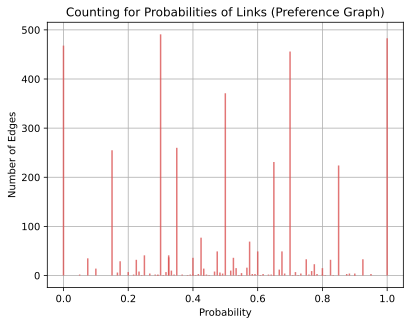

In [74]:
def calculateProbability(item) :
    if item == 0 or item == 1 :
        return 1
    elif item == 2 or item == 3 :
        return 0.7
    elif item == 4 or item == 5 :
        return 0
    else :
        return 0.3
        
#dictionary {edge : probability of existing in the Preference Graph}
edgesProbabilities = {}
def findProbBetween(node1, node2) :
	edges_node1_to_node2 = [calculateProbability(data["questionItem"]) for u, v, data in G.edges(node1, data=True) if v == node2]
	edges_node2_to_node1 = [calculateProbability(data["questionItem"]) for u, v, data in G.edges(node2, data=True) if v == node1]

	if len(edges_node1_to_node2) == 0 and len(edges_node2_to_node1) == 0 :
		return None
	elif len(edges_node1_to_node2) == 0 :
		return np.average(edges_node2_to_node1)
	elif len(edges_node2_to_node1) == 0 :
		return np.average(edges_node1_to_node2)
	else :
		return np.average([np.average(edges_node1_to_node2), np.average(edges_node2_to_node1)])


n = G.number_of_nodes()
for node in range(n) :
    for other in range(node + 1, n) :
        prob = findProbBetween(node, other)
        if prob is not None :
            edgesProbabilities[(node, other)] = prob

fig, ax = plt.subplots()
count = Counter(edgesProbabilities.values())
print(count)
ax.vlines(x=list(count.keys()), ymin=0, ymax=list(count.values()), color="#DB5454", alpha=0.8)
ax.grid(True)
ax.set_title(f"Counting for Probabilities of Links (Preference Graph)")
ax.set_xlabel("Probability")
ax.set_ylabel("Number of Edges")
plt.show()

In [75]:
saveGraphJson(G, "./preferenceGraph.json")